1\. **Reductions**

Find the total mean, and the mean for each row and column of the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
import numpy as np
m = np.arange(12).reshape((3,4))
print(m)
print("Total Mean:",np.mean(m))
print(m.ndim)
for raw in m:
    print(f"Mean of row {raw} :",raw.mean())
mt = m.transpose()
print("="*10)
for col in mt:
    print(f"Mean of colum {col} :",col.mean())
# for row in m.ndim
# print(np.mean(m,axis=0))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Total Mean: 5.5
2
Mean of row [0 1 2 3] : 1.5
Mean of row [4 5 6 7] : 5.5
Mean of row [ 8  9 10 11] : 9.5
Mean of colum [0 4 8] : 4.0
Mean of colum [1 5 9] : 5.0
Mean of colum [ 2  6 10] : 6.0
Mean of colum [ 3  7 11] : 7.0


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [3]:
#Outer np
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
print("Outer product of 2 arrays with outer np: \n",np.outer(u,v))
#For Loop

forloop = np.array([i*j for i in u for j in v]).reshape(4,4)
print("Outer product of 2 arrays with for loop : \n",forloop)

##Numpy broadcasting operations
u = u.reshape(4,1)
print("Outer product of 2 arrays with broadcasting operations : \n",v*u)


Outer product of 2 arrays with outer np: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Outer product of 2 arrays with for loop : 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Outer product of 2 arrays with broadcasting operations : 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. **Matrix masking**

Create a 10 by 6 matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [4]:

matr = 3 * np.random.random_sample((10,6))
print("Matrix with random numbers: \n",matr)
mask = (matr < 0.3)
matr[mask]=0
print("Matrix with replaced numbers <0.3 to 0 : \n",matr)

Matrix with random numbers: 
 [[0.52825026 1.33407732 0.86772211 0.82314375 1.72111743 2.51987783]
 [1.69319092 1.15948755 0.28899847 0.92596094 2.00341605 1.04397071]
 [2.82528678 2.8518753  1.45158835 2.92089245 0.48366951 0.56224585]
 [0.99146347 0.97720578 1.00645618 1.29072735 0.73621516 1.44771472]
 [2.19268348 1.67334129 1.08994559 1.27686808 2.92838586 0.71667809]
 [0.88363285 0.29594477 1.34963188 0.97882664 2.32645343 0.38322291]
 [0.60493341 0.25068439 0.78056985 2.4088083  0.73881085 0.23744146]
 [1.45189098 2.57963225 2.49896793 1.40851509 2.22775663 0.78773323]
 [1.76104431 2.61278045 0.32687761 2.15037499 0.96185555 0.70366135]
 [0.89171952 1.14059425 1.74071866 2.59056798 2.51706165 2.77338373]]
Matrix with replaced numbers <0.3 to 0 : 
 [[0.52825026 1.33407732 0.86772211 0.82314375 1.72111743 2.51987783]
 [1.69319092 1.15948755 0.         0.92596094 2.00341605 1.04397071]
 [2.82528678 2.8518753  1.45158835 2.92089245 0.48366951 0.56224585]
 [0.99146347 0.97720578 1.006

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the sin and cos functions and indicate where they are close

List of points that complete the exercise
[3.141592653589793, 2.824260062318097, 2.5069274710464007, 0.6029319234162229, 0.28559933214452665]


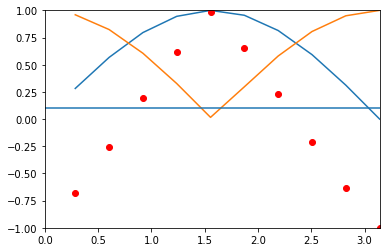

In [5]:
import matplotlib.pyplot as plt
import numpy as np
###1,2,3

a = np.linspace(0,np.pi,100,True)
# print(a)
a = a[9::10]
# print(a)
a = a[::-1]
print("List of points that complete the exercise")
print(list(filter(lambda i: abs(np.sin(i))-abs(np.cos(i)) < 0.1,a)))
plt.plot(a,[abs(np.sin(i)) for i in a])
plt.plot(a,[abs(np.cos(i)) for i in a])
plt.plot(a,[abs(np.sin(i))-abs(np.cos(i)) for i in a],'ro')
plt.axis([0,np.pi,-1,1])
plt.axhline(0.1)
plt.show()

5\. **Matrices**

Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [6]:
import numpy as np
a = np.arange(1,11)
b = a.reshape(10,1)
mul_table = a*b
print(mul_table)
print("Trace of Matrix:",mul_table.trace())
print("Anti-diagonal matrix:",np.fliplr(mul_table).diagonal())
print("Diagonal offset by 1:",mul_table.diagonal(offset=1))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
Trace of Matrix: 385
Anti-diagonal matrix: [10 18 24 28 30 30 28 24 18 10]
Diagonal offset by 1: [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [7]:
positions = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance_array = np.abs(positions - positions[:, np.newaxis])
print("2D grid of distances: \n",distance_array)
print("Grid on KM: \n",distance_array*1.60934)

2D grid of distances: 
 [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
Grid on KM: 
 [[   0.       318.64932  487.63002 1184.47424 1401.73514 1890.9745
  2373.7765  2484.82096 3078.66742 3939.66432]
 [ 318.64932    0.       168.9807   865.82492 1083.08582 1572.32518
  2055.12718 2166.17164 2760.0181  3621.015  ]
 [ 487.63002  168.9807     0.       696.84422  914.10512 1403.34448
  1886.14648 1997.19094 2591.0374  3452.0343 ]
 [1184.47424  865.82492  696.84422    0.       217.2609   706.50026
  1189.30226 1300.3

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Constract a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [8]:
N=99

import numpy
import math

%timeit list(filter(lambda num: numpy.array([num % factor for factor in range(2,1+int(math.sqrt(num)))]).all(), range(2,N+1)))
print(list(filter(lambda num: numpy.array([num % factor for factor in range(2,1+int(math.sqrt(num)))]).all(), range(2,N+1))))

def prime(upto=100000):
    return filter(lambda num: (num % numpy.arange(2,1+int(math.sqrt(num)))).all(), range(2,upto+1))

%timeit prime(N)

1.43 ms ± 429 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
943 ns ± 111 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

[  36  289  144   64  225  225  324    4  121   16  144    0    1    9
  400    0    1    0  576   36   49    9   49   25   81    1  576  100
    1   64   49   16   81   81    9    9    0    1    0    1    1   25
    4  225  289  225    0   16  169    4  529    9  225  324   25  256
   16  576   49   25   25  100  169   25    1  144    9    9  100  256
  100   25   64    4   36   64   36    0   25  225  289  841   49    1
    1   25  144   16    1    4   49    4  144  100  529   64   49   25
   25    1   49   25    1    0   64  121   81   64  441    1  256  400
    1   64    9  121    9    1    0  144   25    1   81  121   49   81
  100   81    1    1   64   36  121    9    9  169   25  144   49  256
  625  121  100  196   49   16   16    4   81    9   16    1    4   16
  225   49    9  169   64  144   81  289    1   36    9   16    1  576
  441    4    1  100   64    0  256   16  144   81    9    1  196  169
   81  100   16  100   25   16   16  441   25   49   16   25   81   49
   25 

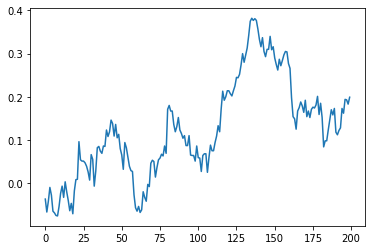

In [9]:
a = np.random.randint(-1,2,(1000,200))
distances = a.sum(axis=1)
distances = np.square(distances)
print(distances)

m = np.square(a).mean(axis=0)
n = np.mean(a,axis=0)
print(m)
# plt.plot(np.arange(200),m)
tmp = 0
fib =[]
for i in n:
    tmp+=i
    fib.append(tmp)


print(fib)
# plt.plot(np.arange(200),fib)
plt.plot(np.arange(200),fib)
plt.show()